In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def show(image):
    cv2.imshow("image",image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
def generateHistogram(image):
    data = {}
    for i in range(256):
        data[i] = 0
    h,w = image.shape
    for i in range(w):
        for j in range(h):
            data[image[j][i]] += 1
            
#     x_range = np.arange(0,256,1)
#     plt.xlim([0,256])
#     plt.bar(x_range,data.values())
    return data

In [12]:
def defaultHistogramFunction(image):
    hist,bins = np.histogram(image.flatten(),256,[0,256])
    print(hist)
    plt.hist(image.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.show()

In [4]:
def domIntensity(image,k):
    hist = generateHistogram(img)
    intensities = []
    for i in range(256):
        intensities.append((i,hist[i]))
    intensities_s = sorted(a,key=lambda x: x[1],reverse=True)
    palette_list = []
    for i in range(k):
        palette_list.append(intensities_s[i][0])
#     palette_list.reverse()
    return palette_list

In [5]:
def dis(palette):
    tmp = np.ones((320,320))
    m = np.ones((320,5))*0
    palette_images = []
    for i in palette:
        palette_images.append(tmp*i)
#         palette_images.append(m)
    res = np.hstack(palette_images)
    return res

In [6]:
img = cv2.imread('../images_1/fullmoon.tiff',0)
show(img)

<BarContainer object of 256 artists>

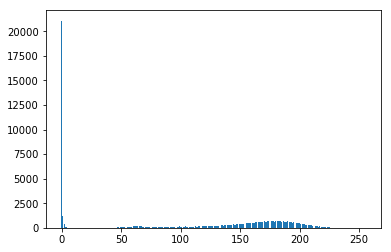

In [9]:
hist = generateHistogram(img)
# hist = np.array(hist)
plt.bar(np.arange(0,256,1),hist.values())

[21076  1229   397    72    37    14    12    16    12    10    13    13
    11     6     7    10     8     8    12     6     9    12     9     8
     7     8     9     3    12     4     8     4     5     6    10     4
    11     6    10     4     6     7     6     5     3    13    16    35
    32    47    66    72    84    94    83   106    83   106   117   118
   177   188   215   148   161   155   153   134   120   127    86    88
    93    97    91   101    85    80    89    96    85    78   100   100
    98    96   119   105    91   100    99   116   120   109   120   111
   110   101   103   133    87   118   108   105   135    97   128   120
   124   121   132   129   133   128   113   157   164   145   144   165
   161   191   151   211   172   182   193   174   169   168   166   205
   210   233   246   235   231   258   281   252   257   306   296   305
   352   335   331   353   389   347   369   419   431   403   434   468
   487   495   493   523   473   506   536   552   

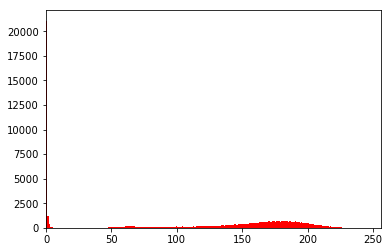

In [13]:
defaultHistogramFunction(img)

In [35]:
hist = np.array(list(generateHistogram(img)))

In [117]:
a = []
for i in range(256):
    a.append((i,hist[i]))
a_s = sorted(a,key=lambda x: x[1],reverse=True)

In [118]:
a_s

[(0, 21076),
 (1, 1229),
 (183, 696),
 (181, 685),
 (190, 681),
 (184, 677),
 (186, 675),
 (182, 669),
 (170, 658),
 (177, 649),
 (180, 649),
 (174, 646),
 (176, 646),
 (173, 644),
 (178, 643),
 (179, 640),
 (171, 639),
 (187, 629),
 (185, 626),
 (169, 619),
 (175, 619),
 (188, 609),
 (172, 602),
 (165, 584),
 (189, 582),
 (192, 581),
 (167, 575),
 (168, 573),
 (191, 567),
 (164, 556),
 (166, 555),
 (163, 552),
 (193, 550),
 (195, 540),
 (162, 536),
 (194, 531),
 (159, 523),
 (161, 506),
 (198, 504),
 (157, 495),
 (158, 493),
 (156, 487),
 (200, 482),
 (197, 479),
 (160, 473),
 (155, 468),
 (199, 460),
 (196, 457),
 (154, 434),
 (152, 431),
 (151, 419),
 (153, 403),
 (2, 397),
 (148, 389),
 (202, 385),
 (201, 384),
 (150, 369),
 (203, 358),
 (147, 353),
 (144, 352),
 (149, 347),
 (204, 343),
 (145, 335),
 (205, 333),
 (146, 331),
 (141, 306),
 (143, 305),
 (142, 296),
 (206, 292),
 (138, 281),
 (207, 278),
 (210, 264),
 (208, 260),
 (137, 258),
 (140, 257),
 (139, 252),
 (134, 246),
 (

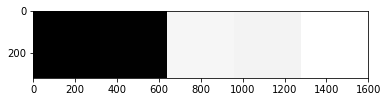

In [152]:
d = domIntensity(img,5)
r = dis(d)
plt.imshow(r,cmap='gray')
# print(r[0])